# Test for using energinet dataset

### Need for runnning colab

In [90]:
# !pip install torch torchvision torchaudio pandas numpy scikit-learn

# from google.colab import files
# uploaded = files.upload()





## Importing Data

In [91]:
import pandas as pd

# Correct the file path to the actual location of the CSV file
df = pd.read_csv('/Users/casper/Documents/GitHub/p9-energy/Dataset/ConsumptionIndustry.csv', sep=';')

# Load the dataset for colab
#df = pd.read_csv('ConsumptionIndustry.csv', sep=';')


# Convert HourDK to datetime
df['HourDK'] = pd.to_datetime(df['HourDK'])

# Convert ConsumptionkWh to numeric
df['ConsumptionkWh'] = df['ConsumptionkWh'].str.replace(",", ".").astype(float)


print(df.head())
print('\n')
print(df.tail())
print('\n')
print(df.info())
print('\n')

            HourUTC              HourDK  MunicipalityNo Branche  \
0  2021-01-01 00:00 2021-01-01 01:00:00             851  Privat   
1  2021-01-01 01:00 2021-01-01 02:00:00             851  Privat   
2  2021-01-01 02:00 2021-01-01 03:00:00             851  Privat   
3  2021-01-01 03:00 2021-01-01 04:00:00             851  Privat   
4  2021-01-01 04:00 2021-01-01 05:00:00             851  Privat   

   ConsumptionkWh  
0       35086.772  
1       31777.762  
2       28423.659  
3       25675.926  
4       24283.909  


                HourUTC              HourDK  MunicipalityNo Branche  \
33834  2024-11-10 18:00 2024-11-10 19:00:00             851  Privat   
33835  2024-11-10 19:00 2024-11-10 20:00:00             851  Privat   
33836  2024-11-10 20:00 2024-11-10 21:00:00             851  Privat   
33837  2024-11-10 21:00 2024-11-10 22:00:00             851  Privat   
33838  2024-11-10 22:00 2024-11-10 23:00:00             851  Privat   

       ConsumptionkWh  
33834       48584.696  


## Data preperation + Feature Engineering

In [92]:
import numpy as np

df['HourDK'] = pd.to_datetime(df['HourDK'])

# Lag features
df['ConsumptionkWh_lag1'] = df['ConsumptionkWh'].shift(1)
df['ConsumptionkWh_lag24'] = df['ConsumptionkWh'].shift(24)
df['ConsumptionkWh_lag168'] = df['ConsumptionkWh'].shift(168)


# Rolling Average
df['ConsumptionkWh_roll24'] = df['ConsumptionkWh'].rolling(window=24).mean()
df['ConsumptionkWh_roll168'] = df['ConsumptionkWh'].rolling(window=168).mean()

# Holidays in Denmark from 2021 to 2024 (source: https://publicholidays.dk/)
holidays = ['2021-01-01', '2021-04-01', '2021-04-02', '2021-04-05', '2021-05-13', '2021-05-21', '2021-06-01', '2021-06-24', '2021-12-24', '2021-12-25', '2021-12-26', '2021-12-31', '2022-01-01', '2022-04-14', '2022-04-15', '2022-04-18', '2022-05-05', '2022-05-13', '2022-05-26', '2022-06-05', '2022-06-24', '2022-12-24', '2022-12-25', '2022-12-26', '2022-12-31', '2023-01-01', '2023-03-24', '2023-03-25', '2023-03-26', '2023-04-07', '2023-05-05', '2023-05-13', '2023-05-26', '2023-06-05', '2023-06-24', '2023-12-24', '2023-12-25', '2023-12-26', '2023-12-31', '2024-01-01', '2024-03-28', '2024-03-29', '2024-03-30', '2024-04-05', '2024-05-05', '2024-05-13', '2024-05-26', '2024-06-05', '2024-06-24']
holidays = pd.to_datetime(holidays)
df['is_holiday'] = df['HourDK'].dt.date.isin(holidays.date)

# Weekday and weekend flag 
df['day_of_week'] = df['HourDK'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)


# Hour of the Day (0-23) to sine/cosine transformation
df['hour_sin'] = np.sin(2 * np.pi * df['HourDK'].dt.hour / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['HourDK'].dt.hour / 24)

# Day of the Week (0-6) to sine/cosine transformation
df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

# Month of the Year (1-12) to sine/cosine transformation
df['month_sin'] = np.sin(2 * np.pi * df['HourDK'].dt.month / 12)
df['month_cos'] = np.cos(2 * np.pi * df['HourDK'].dt.month / 12)

# drop Nan values
df = df.dropna()

print(df.head())
print(df.info())

              HourUTC              HourDK  MunicipalityNo Branche  \
168  2021-01-08 00:00 2021-01-08 01:00:00             851  Privat   
169  2021-01-08 01:00 2021-01-08 02:00:00             851  Privat   
170  2021-01-08 02:00 2021-01-08 03:00:00             851  Privat   
171  2021-01-08 03:00 2021-01-08 04:00:00             851  Privat   
172  2021-01-08 04:00 2021-01-08 05:00:00             851  Privat   

     ConsumptionkWh  ConsumptionkWh_lag1  ConsumptionkWh_lag24  \
168       26017.693            28924.472             26466.212   
169       24636.978            26017.693             24937.988   
170       24047.257            24636.978             24296.799   
171       24098.255            24047.257             24204.419   
172       25498.785            24098.255             25616.628   

     ConsumptionkWh_lag168  ConsumptionkWh_roll24  ConsumptionkWh_roll168  \
168              35086.772           42256.679583            42076.515690   
169              31777.762        

## Splitting the dataet
* Training Set: From 2021-01-01 to 2023-06-30 (2.5 years)
* Validation Set: From 2023-07-01 to 2023-11-30 (5 months)
* Test Set: From 2023-12-01 to 2024-11-10 (approx. 11 months)

In [93]:
# Define date ranges for splitting
from torch.utils.data import Dataset, DataLoader
train_start = "2021-01-01"
train_end = "2023-06-30"
val_start = "2023-07-01"
val_end = "2023-11-30"
test_start = "2023-12-01"
test_end = "2024-11-10"

# Filter the dataset based on the date ranges
train_df = df[(df['HourDK'] >= train_start) & (df['HourDK'] <= train_end)]
val_df = df[(df['HourDK'] >= val_start) & (df['HourDK'] <= val_end)]
test_df = df[(df['HourDK'] >= test_start) & (df['HourDK'] <= test_end)]

# Print dataset sizes to verify
print(f"Training Set: {train_df.shape[0]} rows")
print(f"Validation Set: {val_df.shape[0]} rows")
print(f"Test Set: {test_df.shape[0]} rows")



Training Set: 21671 rows
Validation Set: 3650 rows
Test Set: 8281 rows


## Normalize
Normalize the features and convert to PyTorch-friendly formats

In [94]:
from  sklearn.preprocessing import MinMaxScaler

# Normalize the features
scaler = MinMaxScaler()
feature_cols = ['ConsumptionkWh_lag1', 'ConsumptionkWh_lag24', 'ConsumptionkWh_lag168',
                'ConsumptionkWh_roll24', 'ConsumptionkWh_roll168', 'hour_sin', 'hour_cos',
                'day_sin', 'day_cos', 'month_sin', 'month_cos']
target_col = 'ConsumptionkWh'

# Make explicit copies to avoid modifying slices
train_df = train_df.copy()
val_df = val_df.copy()
test_df = test_df.copy()

# Apply scaling to features (.loc for Explicit Indexing)
train_df.loc[:, feature_cols] = scaler.fit_transform(train_df[feature_cols])
val_df.loc[:, feature_cols] = scaler.transform(val_df[feature_cols])
test_df.loc[:, feature_cols] = scaler.transform(test_df[feature_cols])

# Apply scaling to the target column
train_df.loc[:, target_col] = scaler.fit_transform(train_df[[target_col]])
val_df.loc[:, target_col] = scaler.transform(val_df[[target_col]])
test_df.loc[:, target_col] = scaler.transform(test_df[[target_col]])

## Create PyTorch Datasets and DataLoaders
* Dataset stores the samples and their corresponding labels
* DataLoader wraps an iterable around the Dataset to enable easy access to the samples

In [95]:
import torch
from torch.utils.data import Dataset, DataLoader

class EnergyDataset(Dataset):
  def __init__(self, data, feature_cols, target_col): 
    self.features = torch.tensor(data[feature_cols].values, dtype=torch.float32)
    self.targets = torch.tensor(data[target_col].values, dtype=torch.float32)
  def __len__(self):
    return len(self.targets)
  def __getitem__(self, idx):
    return self.features[idx], self.targets[idx]

# Create datasets
train_dataset = EnergyDataset(train_df, feature_cols, target_col)
val_dataset = EnergyDataset(val_df, feature_cols, target_col)
test_dataset = EnergyDataset(test_df, feature_cols, target_col)

# Create dataloaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Transformer Model

In [96]:
import torch.nn as nn

class EnergyTransformer(nn.Module): 
  def __init__(self, input_size, d_model, nhead, output_size, num_encoder_layers, num_decoder_layers, dim_feedforward, dropout=0.1):
    super(EnergyTransformer, self).__init__()
    self.input_size = input_size
    self.d_model = d_model
    self.embedding = nn.Linear(input_size, d_model) # Embedding layer
    self.positional_encoding = nn.Parameter(torch.zeros(1, 1000, d_model)) # Positional encoding
    self.transformer = nn.Transformer(
      d_model=d_model, nhead=nhead, num_encoder_layers=num_encoder_layers, 
      num_decoder_layers=num_decoder_layers, dim_feedforward=dim_feedforward, 
      dropout=dropout, batch_first=True
    )
    self.fc_out = nn.Linear(d_model, output_size)
  
  def forward(self, x):
    x = self.embedding(x) + self.positional_encoding[:, :x.size(1), :]
    output = self.transformer(x, x)
    return self.fc_out(output[:, -1, :])
  

# Model parameters 
input_size = len(feature_cols) # Number of features
d_model = 128 # Embedding dimension
nhead = 4 # Number of attention heads
output_size = 1 # Single output value
num_encoder_layers = 3 # Number of encoder layers
num_decoder_layers = 3 # Number of decoder layers
dim_feedforward = 256 # Feedforward dimension
dropout = 0.1 # Dropout rate

# Initialize the model
model = EnergyTransformer(input_size, d_model, nhead, output_size, num_encoder_layers,
              num_decoder_layers, dim_feedforward, dropout)


### Define Loss Function and Optimizer

In [97]:
# Define the loss function and optimizer

# Mean Squared Error Loss (L2 Loss)
criterion = nn.MSELoss()

# Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Train the model

In [98]:
import torch
from torch.utils.tensorboard  import SummaryWriter

# Check if GPU is available and move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Setting up Tensorboard
writer = SummaryWriter('runs/energy_transformer')

# Training Loop
num_epochs = 100
for epochs in range(num_epochs): 
  # Set the model to training mode
  model.train()

  train_loss = 0 

  for batch in train_loader: 
    features, targets = batch
    features, targets = features.to(device), targets.to(device)

    # Forward Pass 
    optimizer.zero_grad()
    targets_pred = model(features.unsqueeze(1)) # Add a dummy sequence length dimension
    loss = criterion(targets_pred.squeeze(), targets) # Squeeze the output to match the target shape

    # Backward Pass
    loss.backward()
  
    # Update the weights
    optimizer.step() 

    # Accumulate the loss for monitoring
    train_loss += loss.item()

  # Calculate the average loss over the entire training data
  train_loss /= len(train_loader)

  # Validation Loop
  model.eval()
  val_loss = 0
  with torch.no_grad(): 
    for batch in val_loader: 
      features, targets = batch
      features, targets = features.to(device), targets.to(device)
      targets_pred = model(features.unsqueeze(1))
      loss = criterion(targets_pred.squeeze(), targets)
      val_loss += loss.item()
    
  val_loss /= len(val_loader)

  # Log the training and validation loss to Tensorboard
  writer.add_scalar('Loss/Train', train_loss, epochs)
  writer.add_scalar('Loss/Validation', val_loss, epochs)

  print(f"Epoch {epochs+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

writer.close()
torch.save(model.state_dict(), 'energy_transformer.pth')

Epoch 1/100, Train Loss: 0.0312, Val Loss: 0.0016
Epoch 2/100, Train Loss: 0.0081, Val Loss: 0.0020
Epoch 3/100, Train Loss: 0.0048, Val Loss: 0.0012
Epoch 4/100, Train Loss: 0.0034, Val Loss: 0.0013
Epoch 5/100, Train Loss: 0.0027, Val Loss: 0.0012
Epoch 6/100, Train Loss: 0.0022, Val Loss: 0.0009
Epoch 7/100, Train Loss: 0.0019, Val Loss: 0.0009
Epoch 8/100, Train Loss: 0.0017, Val Loss: 0.0006
Epoch 9/100, Train Loss: 0.0015, Val Loss: 0.0013
Epoch 10/100, Train Loss: 0.0014, Val Loss: 0.0006
Epoch 11/100, Train Loss: 0.0013, Val Loss: 0.0006
Epoch 12/100, Train Loss: 0.0012, Val Loss: 0.0006
Epoch 13/100, Train Loss: 0.0011, Val Loss: 0.0009
Epoch 14/100, Train Loss: 0.0010, Val Loss: 0.0005
Epoch 15/100, Train Loss: 0.0009, Val Loss: 0.0006
Epoch 16/100, Train Loss: 0.0009, Val Loss: 0.0005
Epoch 17/100, Train Loss: 0.0009, Val Loss: 0.0006
Epoch 18/100, Train Loss: 0.0008, Val Loss: 0.0005
Epoch 19/100, Train Loss: 0.0008, Val Loss: 0.0005
Epoch 20/100, Train Loss: 0.0008, Val Lo

# Evaluate the model

In [99]:
# Load the model 
model.load_state_dict(torch.load('energy_transformer.pth', weights_only=True))

# Set model to eval mode
model.eval()

# Collect predictions and targets
predictions, true_values = [], []

with torch.no_grad(): # Disable gradient tracking
  for batch in test_loader: 
    inputs, targets = batch # Get the inputs and targets
    inputs, targets = inputs.to(device), targets.to(device) # Move to GPU if available

    # Forward pass
    outputs = model(inputs.unsqueeze(1)) # Add a dummy sequence length dimension

    # Store predictions and true values
    predictions.append(outputs.cpu().numpy()) # Move to CPU and convert to NumPy (from PyTorch Tensor)
    true_values.append(targets.cpu().numpy()) 


# Flatten the list of NumPy arrays (from multiple batches) into a single array
predictions = np.concatenate(predictions, axis=0)
true_values = np.concatenate(true_values, axis=0)




### Common Evaluation Metrics for Regression


In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(true_values, predictions)
mse = mean_squared_error(true_values, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(true_values, predictions)

# Print the performance metrics
print("Energy Transformer Model Performance:")
print("-------------------------------------")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Save the results to a CSV file
results = {'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2}
results_df = pd.DataFrame(results, index=[0])
results_df.to_csv('energy_transformer_results.csv', index=False)

Energy Transformer Model Performance:
-------------------------------------
Mean Absolute Error: 0.02
Mean Squared Error: 0.01
Root Mean Squared Error: 0.07
R^2 Score: 0.80


### Visualize Model Performance

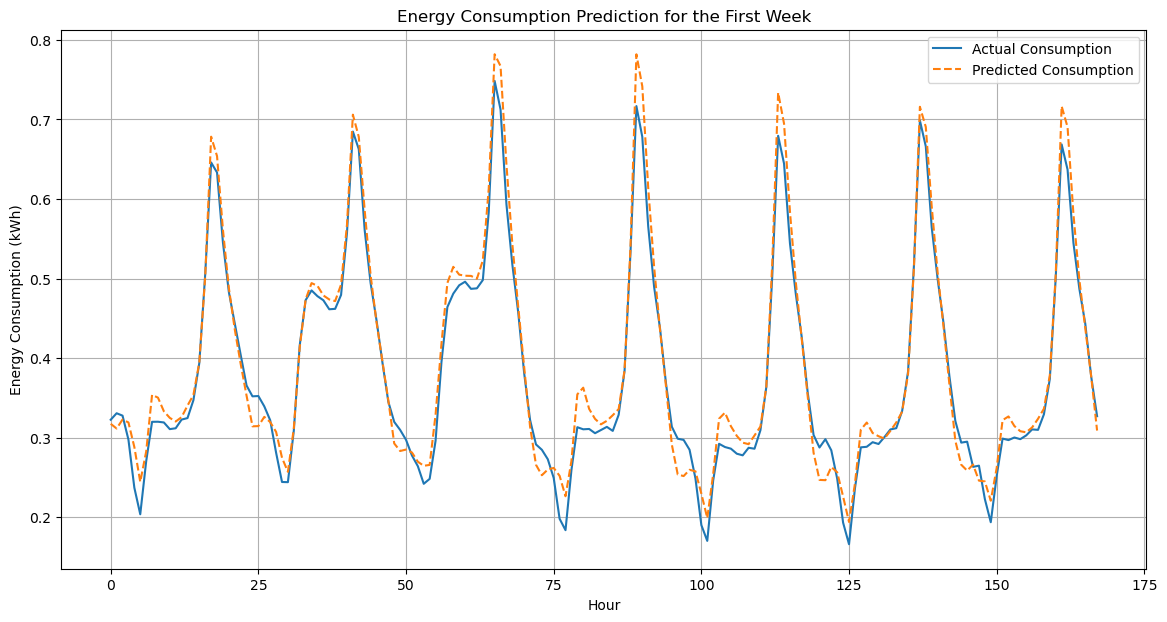

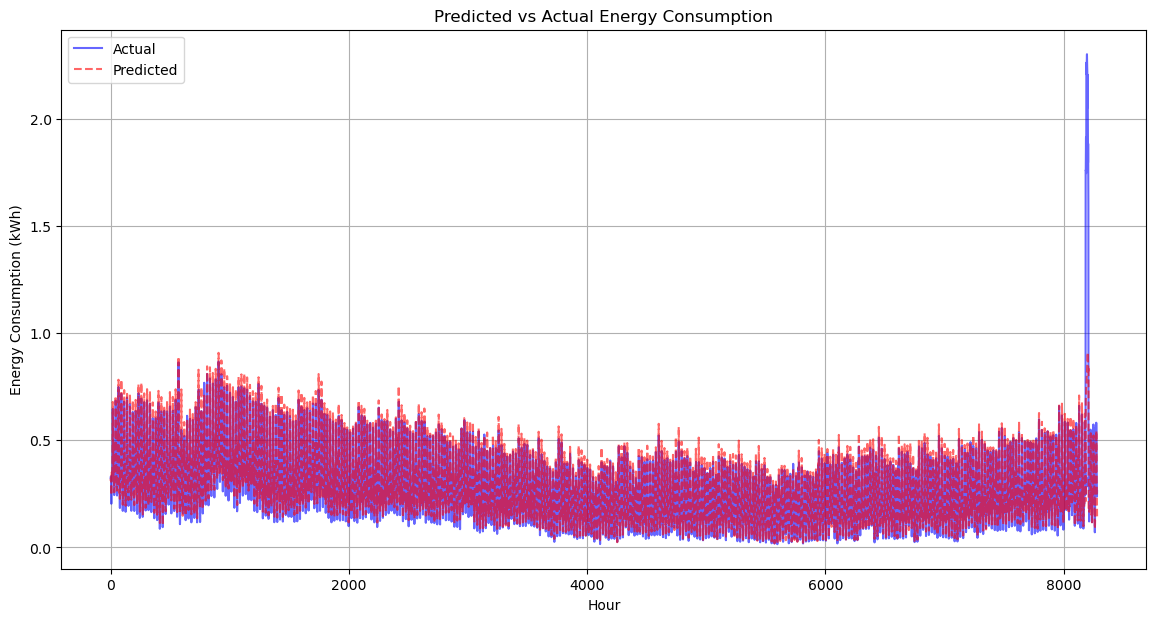

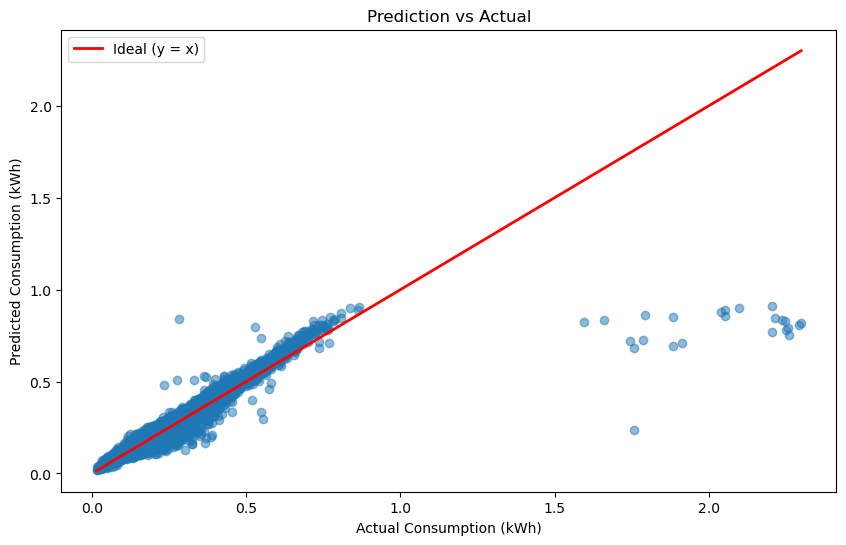

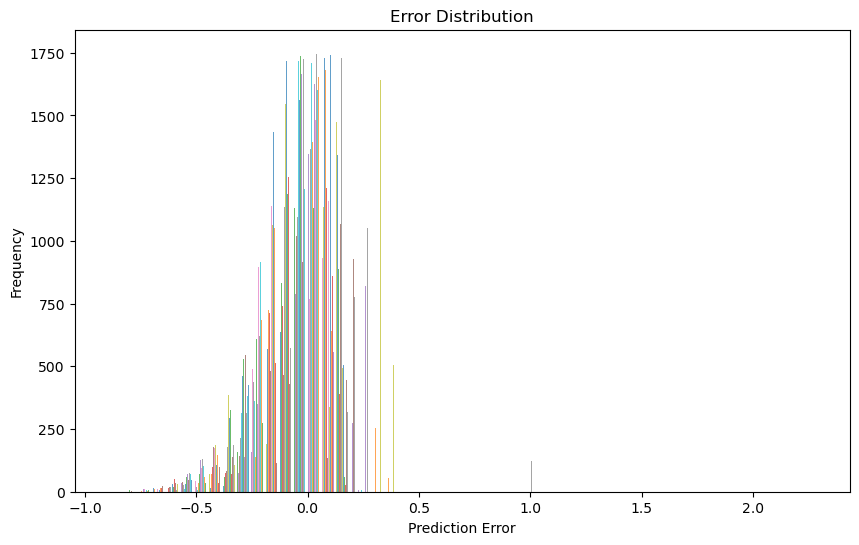

In [101]:
import matplotlib.pyplot as plt

# Plot the first week of predictions
plt.figure(figsize=(14, 7))
plt.plot(true_values[:24*7], label='Actual Consumption')
plt.plot(predictions[:24*7], label='Predicted Consumption', linestyle='--')
plt.title("Energy Consumption Prediction for the First Week")
plt.xlabel("Hour")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.grid(True)
plt.show()

# Plot the entire test set
plt.figure(figsize=(14, 7))
plt.plot(true_values, label='Actual', color='blue', alpha=0.6)
plt.plot(predictions, label='Predicted', linestyle='--', color='red', alpha=0.6)
plt.title("Predicted vs Actual Energy Consumption")
plt.xlabel("Hour")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.grid(True)
plt.show()

#Scatter plot of the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(true_values, predictions, alpha=0.5)
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)],
         color='red', linewidth=2, label="Ideal (y = x)")
plt.xlabel("Actual Consumption (kWh)")
plt.ylabel("Predicted Consumption (kWh)")
plt.title("Prediction vs Actual")
plt.legend()
plt.show()

# Plot the error distribution
errors = true_values - predictions
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, alpha=0.7)
plt.title("Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

# Save the predictions and true values to a CSV file
results = pd.DataFrame({'Actual': true_values.flatten(), 'Predicted': predictions.flatten()})
results.to_csv('energy_transformer_predictions.csv', index=False)